In [6]:
# Import packages
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# Set path
path = os.getcwd()
folder = 'Data DSA3101'
data_directory = os.path.join(path, folder)
os.chdir(data_directory)
print(data_directory)
print(os.getcwd())

c:\Users\inbam\Downloads\DSA3101-Project-main\Data DSA3101
c:\Users\inbam\Downloads\DSA3101-Project-main\Data DSA3101


In [3]:
# Load data
customer_data = pd.read_csv('customers.csv')

# Data cleaning and processing
columns_to_convert = ['credit_default', 'credit_card', 'personal_loan', 'mortgage', 'savings_account', 'investment_product', 'auto_loan', 'wealth_management']
customer_data[columns_to_convert] = customer_data[columns_to_convert].replace({'yes': 1, 'no': 0})
customer_data = customer_data[customer_data['income'] >= 0]
customer_data = customer_data[customer_data['age'] >= 21]

# Show first few entries
customer_data.head()

,customer_id,age,job,marital,education,credit_default,customer_segment,region,income,credit_card,personal_loan,mortgage,savings_account,investment_product,auto_loan,wealth_management
0,1,38,blue-collar,married,secondary,0,High-Value,Urban,2603,1,1,1,1,1,1,1
2,3,73,services,divorced,secondary,0,Budget-Conscious,Urban,3130,1,0,0,0,1,1,0
3,4,87,retired,married,primary,0,Retired,Urban,2401,1,1,0,1,0,0,0
5,6,46,technician,married,tertiary,0,Middle-Market,Urban,3355,1,1,0,1,0,1,1
6,7,70,admin,married,tertiary,0,Budget-Conscious,Urban,4918,1,1,1,1,0,1,0


In [4]:
customer_data_no_text = customer_data[['age', 'credit_default', 'income', 'credit_card', 'personal_loan', 'mortgage', 'savings_account', 'investment_product', 'auto_loan', 'wealth_management']]

data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(customer_data_no_text)
scaled_data.shape

(9525, 10)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [5.0, 5.0, 31.25, 31.25],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [18.125, 18.125, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [49.0625, 49.0625, 121.25, 121.25],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [162.5, 162.5, 193.75, 193.75],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [178.125, 178.125, 241.25, 241.25],
  [85.15625, 85.15625, 209.6875, 209.6875],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [3

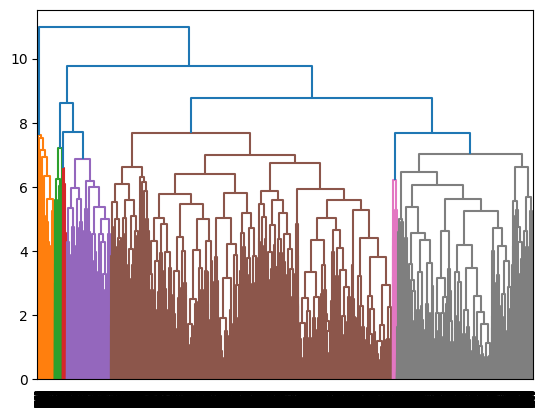

In [5]:
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")

dendrogram(complete_clustering)